## Portfolio Assignment week 02

This week's focus is on manifold learning and text clustering. As part of the portfolio assignment, you are required to make a contribution to either the manifold learning case or the text clustering case. There are several options for your contribution, so you can choose the one that aligns with your learning style or interests the most


### Manifold learning

Study the Tutorial tutorial_manifold_tSNE and the tutorial_manifold_spectral_clustering and the Study_Case_pipeline. Next improve the code by comparing the performance of k-means and spectral clustering. Also compare PCA and t-SNE in the visualization of the result. You can use the pipeline function of scikit-learn and hyperparameter tuning with GridSearchCV. Here's a possible approach:

- Load the dataset to be used for the clustering analysis.
- Preprocess the dataset as needed (e.g., scale the features, normalize the data, etc.).
- Define a pipeline with preprocessing and clustering
- use PCA and t-SNE for dimension reduction and visualize the dimensions, use the clusters to color the datapoints
- use GridSearchCV to optimize the hyper parameters
- Evaluate the performance of the models using a suitable metric
- choose the best cluster method and the best visualization method combination

Explain choises and evaluate outcome. You can do this assignment in pairs but if you do so mention each others name. Do not forget to reference. If you cannot figure out how to use GridSearchCV and or a pipeline, use your own solution

---


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
plt.style.use("dark_background")

In [12]:
# load the data
with open('config.yaml', 'r') as conf:
    config = yaml.load(conf, yaml.SafeLoader)

data = pd.read_csv(config['tSNE_data'])

In [13]:
print(data.shape)
data.head(10)

(357, 22279)


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938
5,GSM362966.CEL.gz,HCC,7.306684,4.368698,3.724894,5.612967,3.224589,6.112209,3.486602,3.314950,...,9.591782,9.615137,11.490197,11.251818,3.931445,3.244908,3.352113,3.234441,3.232316,3.574579
6,GSM362970.CEL.gz,HCC,6.512928,4.644564,3.872719,5.686592,3.304203,6.442455,3.378857,3.265773,...,9.984223,9.800643,12.086031,11.858901,3.759738,3.048110,3.414970,3.212813,3.134725,3.288259
7,GSM362971.CEL.gz,HCC,6.826988,4.019366,4.120792,5.717310,3.218704,6.690327,3.772869,3.513462,...,11.886205,11.807991,12.948334,12.969989,4.054381,3.242238,3.450516,3.194545,3.390836,3.529340
8,GSM362972.CEL.gz,HCC,5.820788,4.159401,3.729004,6.217115,3.183831,6.130592,3.677421,3.401680,...,10.711113,10.473611,12.170045,12.039484,3.830510,3.179205,3.469910,3.290152,3.321098,3.284685
9,GSM362976.CEL.gz,HCC,5.927533,3.905914,4.590218,5.935491,3.364778,7.057836,3.454563,3.552315,...,10.406930,10.252052,12.213109,11.975115,3.861066,3.152652,3.577295,3.186841,3.313967,3.421033


In [14]:

# check the sample types
print(f'Unique types: {data.type.unique()}')
# check missing values
print(f'missing values: {data.isnull().values.sum()}')
# descriptive stats
hcc_df = data[data["type"]=="HCC"]
norm_df = data[data["type"]=="normal"]

hcc_skewedness = hcc_df.iloc[:,2:].skew()
hcc_skewed = hcc_skewedness[(hcc_skewedness < -0.75)|(hcc_skewedness > 0.75)]

norm_skewedness = norm_df.iloc[:,2:].skew()
norm_skewed = norm_skewedness[(norm_skewedness < -0.75)|(norm_skewedness > 0.75)]


print(f'The skewed percentage = {len(hcc_skewed)/hcc_df.shape[1]*100:0.03}%')
print(f'The skewed percentage = {len(norm_skewed)/norm_df.shape[1]*100:0.03}%')

Unique types: ['HCC' 'normal']
missing values: 0
The skewed percentage = 55.7%
The skewed percentage = 55.5%


The amount of skewedness is quite high so log transformation is a good idea.

In [15]:

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

X = data.iloc[:,2:]

def log_transform(x):
    return np.log(x+1) #adding a standard 1 to every value to handle with zeros

sc = StandardScaler()
log_transf = FunctionTransformer(log_transform)



In [16]:
import matplotlib.patches as mpatch
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pipeline = Pipeline(steps=[('transformer',log_transf),('scaler',sc),('decomposition',pca)])

PC = pipeline.fit_transform(X)



In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)

pipeline2 = Pipeline(steps=[('transformer',log_transf),('scaler',sc),('manifold',tsne)])

TS = tsne.fit_transform(X)


In [18]:
km = KMeans(n_clusters=2, random_state=42, n_init='auto')
km_pipeline = Pipeline([('km',km)])

hyperparams = {
    "km__n_clusters": [2, 3, 4, 5, 6, 8, 10],
    "km__random_state": [42],
}


# Instantiate the GridSearchCV object with the Pipeline object and parameter grid
grid_search = GridSearchCV(estimator=km_pipeline, param_grid=hyperparams, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X=PC)


# Access the best combination of hyperparameters and the corresponding evaluation metric score
print(f'PCA embedding{grid_search.best_params_}')
print(grid_search.best_score_)

grid_search.fit(X=TS)

# Access the best combination of hyperparameters and the corresponding evaluation metric score
print(f'tSNE embedding: {grid_search.best_params_}')
print(grid_search.best_score_)

PCA embedding{'km__n_clusters': 10, 'km__random_state': 42}
-79561.34723231579
tSNE embedding: {'km__n_clusters': 10, 'km__random_state': 42}
-884.2627655029297


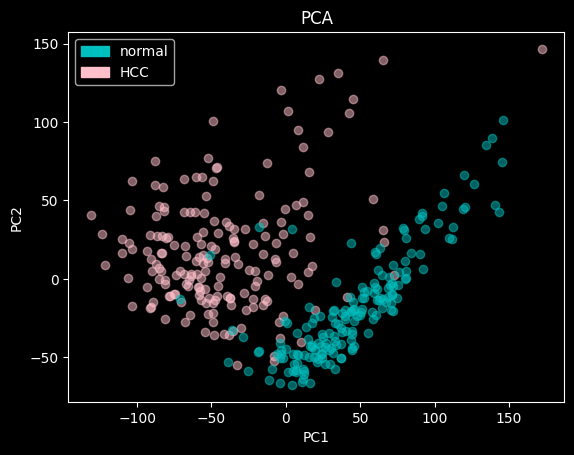

In [19]:
#PCA plot

y = data["type"]
color_dict = {'HCC':'pink', 'normal':'c'}

fig, ax = plt.subplots()
for p,color in zip(PC,y):
    ax.scatter(p[0],p[1],c=color_dict[color], alpha=0.5)

cyan_patch = mpatch.Patch(color='c', label='normal')
red_patch = mpatch.Patch(color='pink', label='HCC')

ax.legend(handles=[cyan_patch,red_patch])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA")
plt.show()

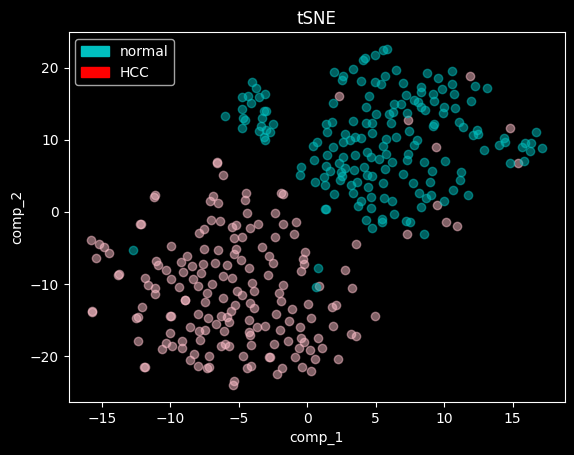

In [20]:
#tSNE plot

fig, ax = plt.subplots()
for t,color in zip(TS,y):
    ax.scatter(t[0],t[1],c=color_dict[color], alpha=0.5)

cyan_patch = mpatch.Patch(color='c', label='normal')
red_patch = mpatch.Patch(color='r', label='HCC')

ax.legend(handles=[cyan_patch,red_patch])
ax.set_xlabel("comp_1")
ax.set_ylabel("comp_2")
ax.set_title("tSNE")
plt.show()